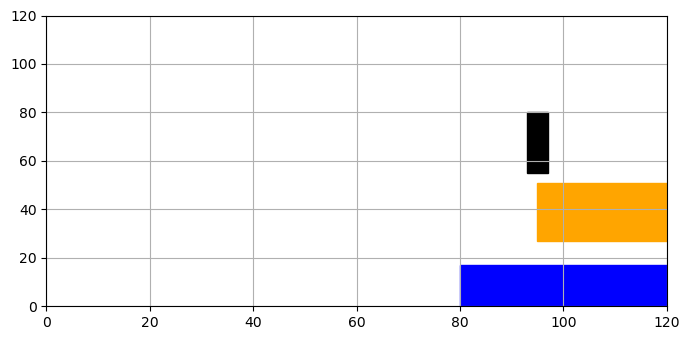

In [13]:
from util import *

# a = generate_participant()

arena = {}

layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

for i in range(3):
    arena[str(i)] = generate_participant()

plot_participants(arena)

a = calculate_overlap(arena['0'], arena['1'])

# print(arena['0'])
# print(arena['1'])

# calculate_layout_area(layout_zone)

# calculate_leeway_coefficient(layout_zone, arena)

# print(a)

# print(a[0])
# calculate_protrusion(layout_zone, arena['0'])

In [14]:
calculate_protrusion(layout_zone, arena['0'])

('prone', (-1, 7))

In [15]:
arena['0']

{'idx': '0',
 'xmin': 80,
 'ymin': -7,
 'width': 41,
 'height': 24,
 'clashes': {},
 'aversions': {},
 'inference': 0,
 'connections': {},
 'turmoil': 0,
 'wounds': [],
 'freespace': {},
 'secondary-freespace-north-east': {},
 'secondary-freespace-south-east': {},
 'secondary-freespace-south-west': {},
 'secondary-freespace-north-west': {}}

In [26]:
participant = arena.pop('2')

p2 = arena.pop('1')

In [28]:
p1n = hustle(participant, p2)

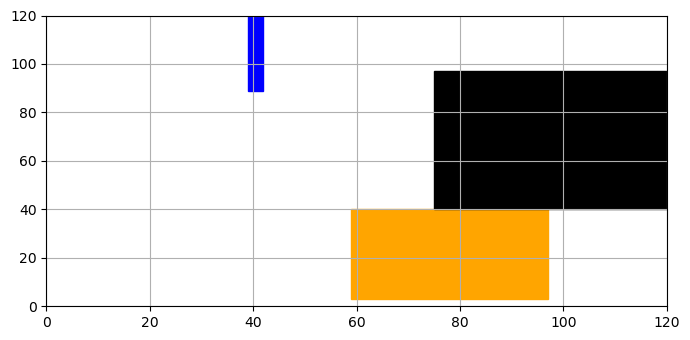

0

In [29]:
p2['xmin'] = p1n[0]
p2['ymin'] = p1n[1]

arena['2'] = participant

arena['1'] = p2

plot_participants(arena)

In [33]:
calculate_overlap(arena['0'], arena['1'])

({}, [False, False, False, False, False, False])

In [ ]:
free_edges = ['north','west', 'east', 'south']


calclulate_free_space(participant, free_edges, arena, layout_zone)

In [ ]:
arena['2']

In [ ]:
a = [1]

if a:
    print('1')
else:
    print('2')

In [ ]:
superior_dict = {
    'dict1': {'key1': 'value1', 'key2': 1, 'key3': 2},
    'dict2': {'key1': 'value4', 'key2': 5, 'key3': 2},
    'dict3': {'key1': 'value7', 'key2': 1, 'key3': 2},
}

key_to_retrieve = 'key2'

width = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

key_to_retrieve = 'key3'

height = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

area = sum([a * b for a, b in zip(width, height)])

print(area)

In [ ]:
calculate_euclidean_distance(arena['0'], arena['1'])

In [ ]:
boolean_list = [False, True, False, False]

if any(boolean_list):
    print("At least one value is True.")
else:
    print("All values are False.")